# Fenics installation

**Step -1: Install Anaconda**

Go to https://www.anaconda.com/ and follow the instructions for Mac

**Step 0: Create a new environment in conda**

`conda create -n myenv python=3.9` (for some reason Mac works with `python=3.8`) (with myenv the name of the environment)

**Step 1: Install Fenics and other usefull packages**

`conda activate myenv` (activates the created environment)

`conda install numpy` (install Numerical computing tools)

`conda install -c conda-forge matplotlib` (install library for creating static, animated, and interactive visualizations)

`conda install -c anaconda jupyter` (install web services for interactive computing)

`conda install -c conda-forge fenics` (install Fenics)


**Step 2: Open Jupyter Notebook**

1. Try:

`jupyter notebook`

2. If it doesn't work, try: 

`jupyter notebook --no-browser`

3. Check if the environment  appears in the Jupyter's kernel!


4. If it doesn't appear, try:

`conda install -c anaconda ipykernel`

`python -m ipykernel install --user --name=myenv`

# Fenics examples

In [1]:
import fenics as fn
import numpy as np
from matplotlib import pyplot as plt

## Example 1: 1D Poisson Equation

$$-u''(x) = 12x^2 - 6x$$
$$u(0) = u(1) = 0.$$

**Define FE mesh**

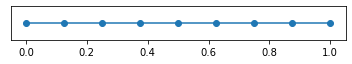

In [2]:
# Define the mesh
Ne = 8 # 4 8 16
mesh = fn.IntervalMesh(Ne,0.,1.)
# Plot the mesh
fn.plot(mesh)
plt.show()

**Define the FE space**

In [3]:
Uh = fn.FunctionSpace(mesh,'CG',1) # (mesh, type of element, and polynomial degree)

**Define trial and test functions**

In [4]:
uh = fn.TrialFunction(Uh)
vh = fn.TestFunction(Uh)

**Define rhs & BCs**

In [5]:
# RHS function
f = fn.Expression('12*pow(x[0],2) - 6*x[0]',degree = 2)
# BC function
g = fn.Constant(0.0)

**Implement BCs**

In [6]:
bc1 = fn.DirichletBC(Uh, g, 'x[0] < DOLFIN_EPS')
bc2 = fn.DirichletBC(Uh, g, 'abs(x[0] - 1.) < DOLFIN_EPS')

**Define bilinear form & RHS**

In [7]:
b = fn.dot(fn.grad(uh),fn.grad(vh))*(fn.dx)
l = f*vh*(fn.dx)

**Solve the linear system**

In [8]:
# Define Fenics function to assign the discrete solution
uh_sol = fn.Function(Uh)
# Solve the linear system
fn.solve(b==l, uh_sol, [bc1,bc2])

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


**Analytical sol in numpy**

In [9]:
x_vector = np.linspace(0.,1.,100)
u_vector = x_vector**3 - x_vector**4

**Plotting results**

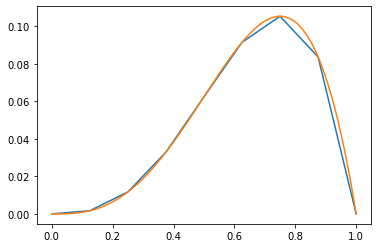

In [10]:
fn.plot(uh_sol)
plt.plot(x_vector,u_vector)
plt.show()

## Example 2: 2D Poisson Equation


$$-\Delta u(x,y) = 2\pi\sin(\pi x)\sin(\pi y),\quad \Omega = [-1,1]\times[-1,1]$$
$$u|_{\partial  \Omega} = 1.$$

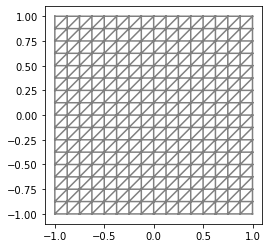

In [11]:
# Define the mesh
Ne = 16 # 4 8 16
mesh = fn.RectangleMesh(fn.Point(-1,-1),fn.Point(1,1),Ne,Ne) #,'crossed')
# Plot the mesh
fn.plot(mesh)
plt.show()

In [12]:
# Define the FE space
Uh = fn.FunctionSpace(mesh,'CG',1) # (mesh, type of element, and polynomial degree)

#Define trial and test functions
uh = fn.TrialFunction(Uh)
vh = fn.TestFunction(Uh)

# RHS function
f = fn.Expression('2*pow(pi,2)*sin(pi*x[0])*sin(pi*x[1])',degree = 2)
# BC function
g = fn.Constant(1.0)

# Implement BCs
bc = fn.DirichletBC(Uh, g, 'on_boundary')

# Define bilinear form & RHS
b = fn.dot(fn.grad(uh),fn.grad(vh))*(fn.dx)
l = f*vh*(fn.dx)

# Define Fenics function to assign the discrete solution
uh_sol = fn.Function(Uh)
# Solve the linear system
fn.solve(b==l, uh_sol, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


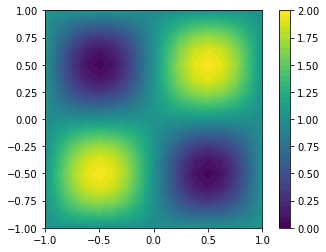

In [13]:
c = fn.plot(uh_sol)
plt.colorbar(c)
plt.show()

## Example 3: 1D Advection-Reaction Equation (LSQ method)


$$u'(x) + ru(x) = r,\quad (-1,1)$$
$$u(0) = 0.$$

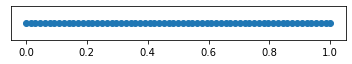

In [14]:
# Define the mesh
Ne = 64 # 4 8 16
mesh = fn.IntervalMesh(Ne,0.,1.)
#
fn.plot(mesh)

In [15]:
# r parameter
r = 40
# Define the FE space
Uh = fn.FunctionSpace(mesh,'CG',1)

#Define trial and test functions
uh = fn.TrialFunction(Uh)
vh = fn.TestFunction(Uh)

# RHS function
f = fn.Constant(r)
# BC function
g = fn.Constant(0.0)

# Implement BCs
bc = fn.DirichletBC(Uh, g, 'x[0] < DOLFIN_EPS')

# Define bilinear form & RHS
b = (uh.dx(0) + fn.Constant(r)*uh)*(vh.dx(0) + fn.Constant(r)*vh)*(fn.dx)
l = f*(vh.dx(0) + fn.Constant(r)*vh)*(fn.dx)

# Define Fenics function to assign the discrete solution
uh_sol = fn.Function(Uh)
# Solve the linear system
fn.solve(b==l, uh_sol, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


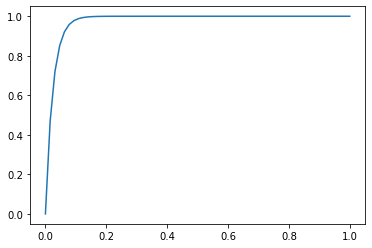

In [16]:
fn.plot(uh_sol)
plt.show()

## Example 4: Mesh refinement

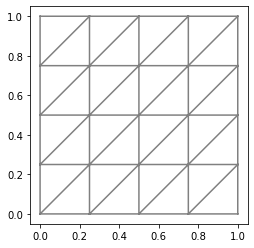

In [17]:
# Define the mesh
Ne = 4 # 4 8 16
mesh = fn.UnitSquareMesh(Ne,Ne)
fn.plot(mesh)
plt.show()

**Refinement criteria**

In [18]:
# Define Cell markers
cell_markers = fn.MeshFunction("bool", mesh, mesh.topology().dim())
# Marker criteria
for cell in fn.cells(mesh):
    if cell.midpoint().x() < 0.5:
        cell_markers[cell] = True

**Mesh refinement**

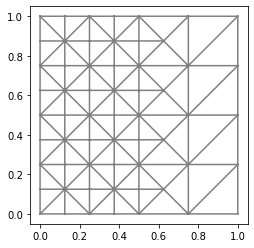

In [19]:
mesh = fn.refine(mesh, cell_markers)
fn.plot(mesh)
plt.show()

**Refinement criteria**

In [20]:
# Define Cell markers
cell_markers = fn.MeshFunction("bool", mesh, mesh.topology().dim())
# Marker criteria
for cell in fn.cells(mesh):
    if cell.midpoint().x() < 0.25:
        cell_markers[cell] = True

**Mesh refinement**

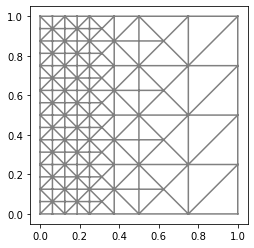

In [21]:
mesh = fn.refine(mesh, cell_markers)
fn.plot(mesh)
plt.show()